#### 1850200-黄天洋-第十二周实验课-申优
## 1&emsp;内容
#### 写出以下算法的函数实现
#### 1.&emsp;二分法

In [66]:
import numpy as np
#二分法
def bisection(f,interval,eps):
    a=interval[0]
    b=interval[1]
    k=0
    while (b-a)/2 > eps:
        c=(a+b)/2
        if np.abs(f(c)) < eps:
            break
        if f(a)*f(c)<0:
            b=c
        else:
            a=c
        k+=1
    return [c,k]

#求解
f=lambda x:x**3+x**2-1
interval=np.array([0,1])
eps=10**-6
x,k=bisection(f,interval,eps)
print('对于方程x^3+x^2-1=0，初始区间设为',interval)
print('二分法求方程的解为',x,'迭代次数为',k)

对于方程x^3+x^2-1=0，初始区间设为 [0 1]
二分法求方程的解为 0.7548770904541016 迭代次数为 19


#### 2.&emsp;牛顿法

In [118]:
import numpy as np
from scipy.misc import derivative

#牛顿法
def newton(f,x0,eps):
    x=[]
    x_old=x0
    x.append(x0)
    error=1
    while error>eps or np.abs(f(x_old))>eps:
        x_new=x_old-f(x_old)/derivative(f,x_old,dx=10**-6)
        error=np.abs(x_new-x_old)
        x.append(x_new)
        x_old=x_new
    k=np.size(x)-1
    return [x,x_new,k]

#牛顿下山法
def newtondownhill(f,x0,eps):
    x=[]
    x_old=x0
    x.append(x0)
    error=1
    lam=1
    while error>eps or np.abs(f(x_old))>eps:
        x_new=x_old-lam*f(x_old)/derivative(f,x_old,dx=10**-6)
        if np.abs(f(x_new))>np.abs(f(x_old)):
            lam=lam/2
        else:
            error=np.abs(x_new-x_old)
            x.append(x_new)
            x_old=x_new
    k=np.size(x)-1
    return [x,x_new,k]

#求解
f=lambda x:x**2+np.sin(10*x)-1
x0=0
eps=10**-6
print('对于方程x^2+sin(10x)-1=0，初值设为',x0)
x,x_new,k=newton(f,x0,eps)
print('牛顿法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=newtondownhill(f,x0,eps)
print('牛顿下山法求方程的解为',x_new,'迭代次数为',k)

对于方程x^2+sin(10x)-1=0，初值设为 0
牛顿法求方程的解为 0.137590560278434 迭代次数为 6
牛顿下山法求方程的解为 0.137590560278434 迭代次数为 6


#### 3.&emsp;割线法

In [266]:
import numpy as np

#双点割线法
def secant(f,interval,eps):
    x=[]
    x.append(interval[0])
    x.append(interval[1])
    error=1
    i=1
    while error>eps:
        x_new=x[i]-f(x[i])*(x[i]-x[i-1])/(f(x[i])-f(x[i-1]))
        x.append(x_new)
        error=np.abs(x[i+1]-x[i])
        i+=1
    k=np.size(x)-2
    return [x,x_new,k]

#单点割线法
def secant_s(f,interval,eps):
    x=[]
    x.append(interval[0])
    x.append(interval[1])
    error=1
    i=1
    while error>eps:
        x_new=x[i]-f(x[i])*(x[i]-x[0])/(f(x[i])-f(x[0]))
        x.append(x_new)
        error=np.abs(x[i+1]-x[i])
        i+=1
    k=np.size(x)-2
    return [x,x_new,k]

#求解
f=lambda x:x**3-x-1
interval=np.array([1,2])
eps=10**-6
print('对于方程x^3-x-1=0，初始区间设为',interval)
x,x_new,k=secant(f,interval,eps)
print('双点割线法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=secant_s(f,interval,eps)
print('单点割线法求方程的解为',x_new,'迭代次数为',k)

对于方程x^3-x-1=0，初始区间设为 [1 2]
双点割线法求方程的解为 1.3247179572446703 迭代次数为 7
单点割线法求方程的解为 1.324717682653014 迭代次数为 15


## 2&emsp;练习
#### 1.&emsp;用以上函数求解如下线性方程组
(1)$x^3-2x-5=0(x_0\approx 2)$

In [119]:
#求解前请先运行内容中的所有函数
#定义函数以及初始区间、初值、误差
f=lambda x:x**3-2*x-5
interval=np.array([0,3])
x0=2
eps=10**-6
print('初始区间设为',interval,'初值设为',x0)

#求解
x,k=bisection(f,interval,eps)
print('二分法的解为',x,'迭代次数为',k)
x,x_new,k=newton(f,x0,eps)
print('牛顿法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=newtondownhill(f,x0,eps)
print('牛顿下山法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=secant(f,interval,eps)
print('割线法求方程的解为',x_new,'迭代次数为',k)

初始区间设为 [0 3] 初值设为 2
二分法的解为 2.094550609588623 迭代次数为 21
牛顿法求方程的解为 2.0945514815423265 迭代次数为 4
牛顿下山法求方程的解为 2.0945514815423265 迭代次数为 4
割线法求方程的解为 2.094551481542333 迭代次数为 12


(2)$\sin x-0.25x^2=0(x_0\approx 2)$

In [120]:
#求解前请先运行内容中的所有函数
#定义函数以及初始区间、初值、误差
f=lambda x:np.sin(x)-0.25*x**2
interval=np.array([1,3])
x0=2
eps=10**-6
print('初始区间设为',interval,'初值设为',x0)

#求解
x,k=bisection(f,interval,eps)
print('二分法的解为',x,'迭代次数为',k)
x,x_new,k=newton(f,x0,eps)
print('牛顿法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=newtondownhill(f,x0,eps)
print('牛顿下山法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=secant(f,interval,eps)
print('割线法求方程的解为',x_new,'迭代次数为',k)

初始区间设为 [1 3] 初值设为 2
二分法的解为 1.9337539672851562 迭代次数为 17
牛顿法求方程的解为 1.9337537628270214 迭代次数为 4
牛顿下山法求方程的解为 1.9337537628270214 迭代次数为 4
割线法求方程的解为 1.933753762827019 迭代次数为 8


(3)$x-e^{-x}=0(x_0\approx 0.5)$

In [121]:
#求解前请先运行内容中的所有函数
#定义函数以及初始区间、初值、误差
f=lambda x:x-np.e**(-x)
interval=np.array([0,1])
x0=0.5
eps=10**-6
print('初始区间设为',interval,'初值设为',x0)

#求解
x,k=bisection(f,interval,eps)
print('二分法的解为',x,'迭代次数为',k)
x,x_new,k=newton(f,x0,eps)
print('牛顿法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=newtondownhill(f,x0,eps)
print('牛顿下山法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=secant(f,interval,eps)
print('割线法求方程的解为',x_new,'迭代次数为',k)

初始区间设为 [0 1] 初值设为 0.5
二分法的解为 0.5671443939208984 迭代次数为 19
牛顿法求方程的解为 0.5671432904097811 迭代次数为 3
牛顿下山法求方程的解为 0.5671432904097811 迭代次数为 3
割线法求方程的解为 0.5671432904097046 迭代次数为 5


(4)$x^3-5\sin x+2=0(x_0\approx -2)$

In [122]:
#求解前请先运行内容中的所有函数
#定义函数以及初始区间、初值、误差
f=lambda x:x**3-5*np.sin(x)+2
interval=np.array([-3,-1])
x0=-2
eps=10**-6
print('初始区间设为',interval,'初值设为',x0)

#求解
x,k=bisection(f,interval,eps)
print('二分法的解为',x,'迭代次数为',k)
x,x_new,k=newton(f,x0,eps)
print('牛顿法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=newtondownhill(f,x0,eps)
print('牛顿下山法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=secant(f,interval,eps)
print('割线法求方程的解为',x_new,'迭代次数为',k)

初始区间设为 [-3 -1] 初值设为 -2
二分法的解为 -1.889688491821289 迭代次数为 20
牛顿法求方程的解为 -1.889687293293381 迭代次数为 4
牛顿下山法求方程的解为 -1.889687293293381 迭代次数为 4
割线法求方程的解为 -1.8896872931950783 迭代次数为 9


#### 2.&emsp;分别用二分法牛顿法割线法求解如下非线性方程
(1)$x^3-x-1=0$在区间$\left[1,2\right]$内的根；

In [123]:
#求解前请先运行内容中的所有函数
#定义函数以及初始区间、初值、误差
f=lambda x:x**3-x-1
interval=np.array([1,2])
x0=1.5
eps=10**-6
print('初始区间设为',interval,'初值设为',x0)

#求解
x,k=bisection(f,interval,eps)
print('二分法的解为',x,'迭代次数为',k)
x,x_new,k=newton(f,x0,eps)
print('牛顿法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=newtondownhill(f,x0,eps)
print('牛顿下山法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=secant(f,interval,eps)
print('割线法求方程的解为',x_new,'迭代次数为',k)

初始区间设为 [1 2] 初值设为 1.5
二分法的解为 1.324716567993164 迭代次数为 19
牛顿法求方程的解为 1.3247179572447898 迭代次数为 4
牛顿下山法求方程的解为 1.3247179572447898 迭代次数为 4
割线法求方程的解为 1.3247179572446703 迭代次数为 7


(2)$x-\cos x=0$在区间$(0,\frac{\pi}{2})$内的根；

In [124]:
#求解前请先运行内容中的所有函数
#定义函数以及初始区间、初值、误差
f=lambda x:x-np.cos(x)
interval=np.array([0,np.pi/2])
x0=np.pi/4
eps=10**-6
print('初始区间设为',interval,'初值设为',x0)

#求解
x,k=bisection(f,interval,eps)
print('二分法的解为',x,'迭代次数为',k)
x,x_new,k=newton(f,x0,eps)
print('牛顿法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=newtondownhill(f,x0,eps)
print('牛顿下山法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=secant(f,interval,eps)
print('割线法求方程的解为',x_new,'迭代次数为',k)

初始区间设为 [0.         1.57079633] 初值设为 0.7853981633974483
二分法的解为 0.7390851262506977 迭代次数为 17
牛顿法求方程的解为 0.7390851332151611 迭代次数为 3
牛顿下山法求方程的解为 0.7390851332151611 迭代次数为 3
割线法求方程的解为 0.7390851332151607 迭代次数为 6


(3)$x-\ln x=2$在区间$(2,+\infty)$的根

In [125]:
#求解前请先运行内容中的所有函数
#定义函数以及初始区间、初值、误差
f=lambda x:x-np.log(x)-2
interval=np.array([2,10000])
x0=5000
eps=10**-6
print('初始区间设为',interval,'初值设为',x0)

#求解
x,k=bisection(f,interval,eps)
print('二分法的解为',x,'迭代次数为',k)
x,x_new,k=newton(f,x0,eps)
print('牛顿法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=newtondownhill(f,x0,eps)
print('牛顿下山法求方程的解为',x_new,'迭代次数为',k)
x,x_new,k=secant(f,interval,eps)
print('割线法求方程的解为',x_new,'迭代次数为',k)

初始区间设为 [    2 10000] 初值设为 5000
二分法的解为 3.146193880122155 迭代次数为 31
牛顿法求方程的解为 3.1461932206205825 迭代次数为 6
牛顿下山法求方程的解为 3.1461932206205825 迭代次数为 6
割线法求方程的解为 3.146193220620776 迭代次数为 6


#### 3.&emsp;计算方程
$$\sum_{k=1}^{10}ke^{-\cos kx}\sin kx=2$$
在区间$\left[-10,10\right]$中的所有根.

In [276]:
#求解前请先运行内容中的所有函数
#定义函数
def f(x):
    sum=0
    for k in range(1,11):
        sum+=k*np.e**(-np.cos(k*x))*np.sin(k*x)
    sum-=2
    return sum

#求解
eps=10**-5
x_all=[]
x_final=[]
x0=np.linspace(-10,10,1000)
for i in range(np.size(x0)):
    x,x_new,k=newton(f,x0[i],eps)
    x_all.append(x_new)
x_all.sort()
for i in range(np.size(x_all)):
    if x_all[i]>=-10 and x_all[i]<=10:
        if x_all[i+1]-x_all[i]>eps:
             x_final.append(x_all[i])
    
print('区间[-10,10]中的所有根为',x_final)
print('根的总数为',np.size(x_final))

区间[-10,10]中的所有根为 [-9.967424360524614, -9.7797174666094, -9.614903264574945, -9.430227462369631, -9.220782234017312, -9.087104356137841, -8.85301921044498, -8.712508677878013, -8.644234032601428, -8.513365279833392, -8.289992512257774, -7.898157247314594, -7.630701237371777, -7.311531157874084, -7.032010264637076, -6.695539263303861, -6.269125347345695, -5.881383769818408, -5.509911506564675, -5.281615212755964, -4.89290266534889, -4.6958911892572415, -4.237337892274582, -4.0708334563852695, -3.684239053344189, -3.4965321594617067, -3.3317179574050377, -3.1470421552074908, -2.9375969268377258, -2.803919048946228, -2.5698339032653936, -2.429323370698448, -2.361048725335287, -2.2301799724663147, -2.006807205078187, -1.6149719395071112, -1.347515930192191, -1.0283458510022934, -0.7488249574574902, -0.41235395663508634, 0.014059959826712171, 0.401801537361179, 0.7732738006628459, 1.0015700944236219, 1.3902826419145995, 1.5872941179223454, 2.0458474147912176, 2.2123518507943167, 2.5989462538

## 3&emsp;作业
#### **1.&emsp;不动点迭代**
实验目的：掌握循环语句和迭代算法编程<br/>
实验内容：绘制函数$x-4+2^x=0$在区间$\left[-4,4\right]$内的图形，然后用如下迭代格式
$$x_{k+1}=\dfrac{\ln(4-x_k)}{\ln 2}$$
，近似求解该非线性方程在$x_0=1.5$附近的根。

该非线性方程在x=1.5附近的根为 1.3861672223050707


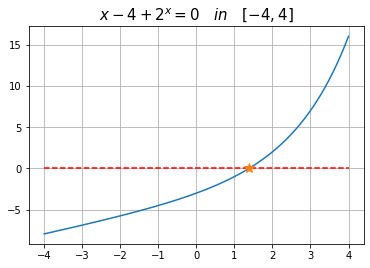

In [277]:
import numpy as np
import matplotlib.pyplot as plt

#定义函数
f=lambda x:x-4+2**x
x0=1.5
x_old=x0
eps=10**-6
error=1
#使用迭代格式
while error>eps or np.abs(f(x_old))>eps:
    x_new=np.log(4-x_old)/np.log(2)
    error=np.abs(x_new-x_old)
    x_old=x_new
print('该非线性方程在x=1.5附近的根为',x_new)
#绘图
x=np.linspace(-4,4,1000)
plt.title('$x-4+2^x=0\quad in\quad [-4,4]$',size=15)
plt.plot(x,f(x),x,np.zeros(1000),'r--')
plt.plot(x_new,f(x_new),marker='*',markersize=10)
plt.grid()
plt.show()

#### **2.&emsp;不动点迭代**
实验目的：理解重根对牛顿法收敛速度的影响。<br/>
实验内容：考虑方程$x^4-4x^2+4=0$，$\sqrt{2}$为其二重根。用如下三种迭代格式求解，为使数值解具有$10$位有效数字，迭代法所需迭代次数<br/>
(1)$x_{k+1}=x_k-\dfrac{x_k^2-2}{4x_k}$<br/>

(2)$x_{k+1}=x_k-\dfrac{x_k^2-2}{2x_k}$<br/>

(3)$x_{k+1}=x_k-\dfrac{x_k(x_k^2-2)}{x_k^2+2}$

In [274]:
import numpy as np

#定义函数，并分别使用三种迭代格式
f=lambda x:x**4-4*x**2+4
x0=1
x_old=x0
eps=10**-11
error=1
k=0
while error>eps or np.abs(f(x_old))>eps:
    x_new=x_old-(x_old**2-2)/(4*x_old)
    error=np.abs(x_new-x_old)
    x_old=x_new
    k+=1
print('(1)数值解为','%.10g' % x_new,'迭代次数为',k)

x_old=x0
error=1
k=0
while error>eps or np.abs(f(x_old))>eps:
    x_new=x_old-(x_old**2-2)/(2*x_old)
    error=np.abs(x_new-x_old)
    x_old=x_new
    k+=1
print('(2)数值解为','%.10g' % x_new,'迭代次数为',k)

x_old=x0
error=1
k=0
while error>eps or np.abs(f(x_old))>eps:
    x_new=x_old-x_old*(x_old**2-2)/(x_old**2+2)
    error=np.abs(x_new-x_old)
    x_old=x_new
    k+=1
print('(3)数值解为','%.10g' % x_new,'迭代次数为',k)

(1)数值解为 1.414213562 迭代次数为 35
(2)数值解为 1.414213562 迭代次数为 5
(3)数值解为 1.414213562 迭代次数为 5


#### **3.&emsp;不动点迭代**
实验目的：对比分析不同的不动点迭代的收敛速度<br/>
实验内容：分别用牛顿，单点割线法和双点割线法求解非线性方程$11x^{11}-1=0$在$x_0=1$附近的根。要求精确到小数点后三位有效数字。

In [272]:
#求解前请先运行内容中的所有函数
f=lambda x:11*x**11-1
x0=1
eps=10**-4
interval=np.array([0.9,1.1])

x,x_new,k=newton(f,x0,eps)
print('牛顿法求方程的解为','%.3g' % x_new,'迭代次数为',k)
x,x_new,k=secant_s(f,interval,eps)
print('单点割线法求方程的解为','%.3g' % x_new,'迭代次数为',k)
x,x_new,k=secant(f,interval,eps)
print('双点割线法求方程的解为','%.3g' % x_new,'迭代次数为',k)

牛顿法求方程的解为 0.804 迭代次数为 6
单点割线法求方程的解为 0.804 迭代次数为 10
双点割线法求方程的解为 0.804 迭代次数为 7


#### **4.&emsp;不动点迭代**
实验目的：非线性方程不动点迭代的局部收敛性。<br/>
实验内容：考虑方程$(x^2-0.2)e^{-0.5x}=0$，<br/>
(1)分别取初值$x_0=-0.01$和$x_0=-0.03$，用牛顿法求解该方程。<br/>
(2)分别取初值$x_0=-0.01$和$x_0=-0.03$，用牛顿下山法求解该方程。

In [257]:
#求解前请先运行内容中的所有函数
f=lambda x:(x**2-0.2)*np.e**(-0.5*x)
x1=-0.01
x2=-0.03
eps=10**-6

print('(1)')
x,x_new,k=newton(f,x1,eps)
print('x0=-0.01时，牛顿法求方程的解为',x_new,'迭代次数为',k)
print('x0=-0.03时，牛顿法不收敛')
print('(2)')
x,x_new,k=newtondownhill(f,x1,eps)
print('x0=-0.01时，牛顿下山法求方程的解为',x_new,'迭代次数为',k)
print('x0=-0.03时，牛顿下山法不收敛')

(1)
x0=-0.01时，牛顿法求方程的解为 -0.4472135954999669 迭代次数为 6
x0=-0.03时，牛顿法不收敛
(2)
x0=-0.01时，牛顿下山法求方程的解为 -0.44721407269091346 迭代次数为 13
x0=-0.03时，牛顿下山法不收敛
